Project on Telangana

In [1]:
import pandas as pd
import numpy as np
from pprint import pprint
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
district_df= pd.read_csv(r"C:\Users\paulk\Downloads\C7_Input Files\C7_Input Files\dataset\dim_districts.csv")

In [3]:
district_df

,dist_code,district
0,19_1,Adilabad
1,22_2,Bhadradri Kothagudem
2,21_1,Hanumakonda
3,16_1,Hyderabad
4,20_2,Jagtial
5,21_3,Jangoan
6,21_7,Jayashankar Bhupalpally
7,14_2,Jogulamba Gadwal
8,18_2,Kamareddy
9,20_1,Karimnagar


In [4]:
fact_stamp_df= pd.read_csv(r"C:\Users\paulk\Downloads\C7_Input Files\C7_Input Files\dataset\fact_stamps.csv")

In [5]:
fact_stamp_df

,dist_code,month,documents_registered_cnt,documents_registered_rev,estamps_challans_cnt,estamps_challans_rev
0,14_1,2019-04-01,4533,59236363,0,0
1,17_3,2019-04-01,4151,41508762,0,0
2,20_3,2019-04-01,2116,23674170,0,0
3,21_5,2019-04-01,1089,15915285,0,0
4,23_1,2019-04-01,6133,82593256,0,0
...,...,...,...,...,...,...
1499,20_4,2023-03-01,1510,54036552,1596,57171081
1500,14_5,2023-03-01,980,23898383,1026,23106330
1501,21_1,2023-03-01,4321,279791569,4642,284765300
1502,22_2,2023-03-01,1255,18695648,1566,22453502


In [6]:
dim_date_df= pd.read_csv(r"C:\Users\paulk\Downloads\C7_Input Files\C7_Input Files\dataset\dim_date.csv")

In [7]:
dim_date_df

,month,Mmm,quarter,fiscal_year
0,2019-04-01,Apr,Q1,2019
1,2019-05-01,May,Q1,2019
2,2019-06-01,Jun,Q1,2019
3,2019-07-01,Jul,Q2,2019
4,2019-08-01,Aug,Q2,2019
5,2019-09-01,Sep,Q2,2019
6,2019-10-01,Oct,Q3,2019
7,2019-11-01,Nov,Q3,2019
8,2019-12-01,Dec,Q3,2019
9,2020-01-01,Jan,Q4,2019


In [8]:
merged_df = pd.merge(district_df, fact_stamp_df, on='dist_code', how='inner')

In [9]:
merged_df

,dist_code,district,month,documents_registered_cnt,documents_registered_rev,estamps_challans_cnt,estamps_challans_rev
0,19_1,Adilabad,2019-04-01,1043,12672655,0,0
1,19_1,Adilabad,2019-05-01,1092,15177385,0,0
2,19_1,Adilabad,2019-06-01,824,11443194,0,0
3,19_1,Adilabad,2019-07-01,1186,17853370,0,0
4,19_1,Adilabad,2019-08-01,1124,14955291,0,0
...,...,...,...,...,...,...,...
1499,23_3,Yadadri Bhuvanagiri,2022-11-01,5334,166902177,5476,168772405
1500,23_3,Yadadri Bhuvanagiri,2022-12-01,5176,167334275,5312,166377762
1501,23_3,Yadadri Bhuvanagiri,2023-01-01,4676,155087383,5032,197930372
1502,23_3,Yadadri Bhuvanagiri,2023-02-01,4932,259411612,5061,259392115


In [10]:
merged_df = pd.merge(dim_date_df, merged_df, on='month', how='inner')

In [11]:
merged_df

,month,Mmm,quarter,fiscal_year,dist_code,district,documents_registered_cnt,documents_registered_rev,estamps_challans_cnt,estamps_challans_rev
0,2019-04-01,Apr,Q1,2019,19_1,Adilabad,1043,12672655,0,0
1,2019-04-01,Apr,Q1,2019,22_2,Bhadradri Kothagudem,542,12610700,0,0
2,2019-04-01,Apr,Q1,2019,21_1,Hanumakonda,4186,120047007,0,0
3,2019-04-01,Apr,Q1,2019,16_1,Hyderabad,5268,724238098,0,0
4,2019-04-01,Apr,Q1,2019,20_2,Jagtial,1943,26031616,0,0
...,...,...,...,...,...,...,...,...,...,...
1499,2023-03-01,Mar,Q4,2022,23_2,Suryapet,3296,91477690,3490,97232235
1500,2023-03-01,Mar,Q4,2022,15_3,Vikarabad,1520,48535604,1544,47283515
1501,2023-03-01,Mar,Q4,2022,14_4,Wanaparthy,1833,52326513,1898,43244413
1502,2023-03-01,Mar,Q4,2022,21_2,Warangal,1020,23471104,1016,20237995


This gives us a complete view of the three tables merged together to get the insights.

In [12]:
merged_df.to_excel(r"C:\Users\paulk\Downloads\C7_Input Files\C7_Input Files\merged_df.xlsx")

Top 5 districts with the highest document registration revenue growth between FY 2019 and 2022:
district
Rangareddy            14448100747
Medchal_Malkajgiri    11500235014
Hyderabad              5966606163
Sangareddy             3675577001
Hanumakonda            1078958209
dtype: int64


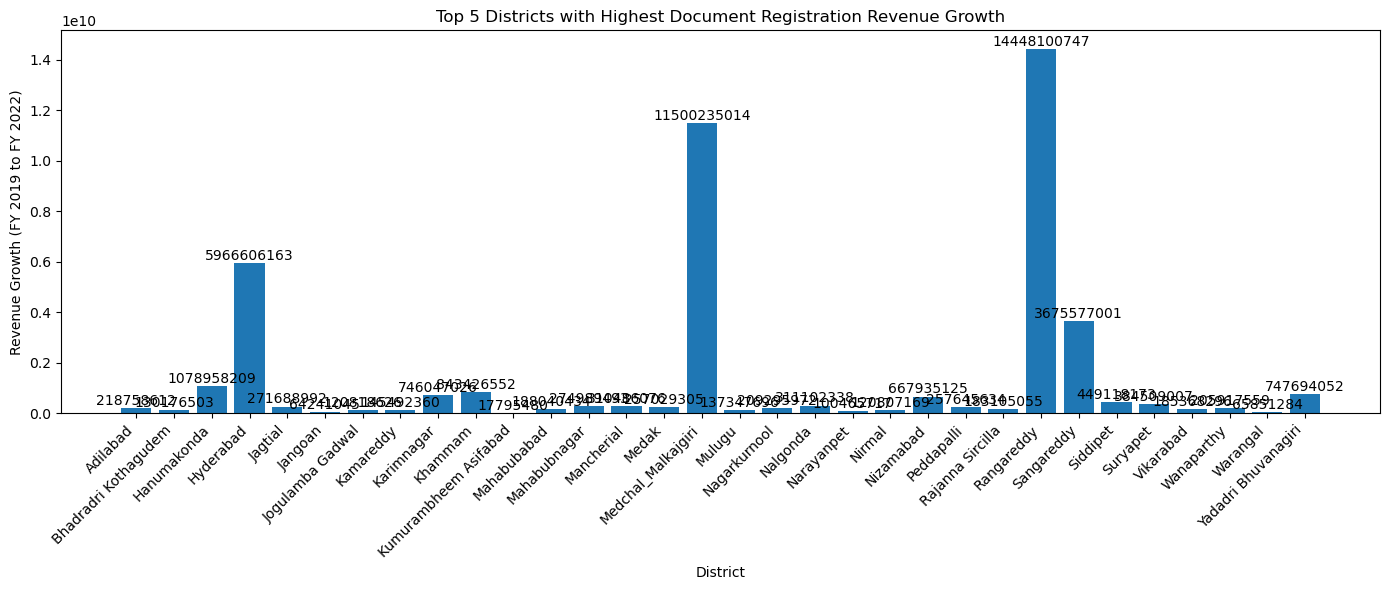

In [34]:
# Filter the dataset for FY 2019 and FY 2022
merged_df_filtered = merged_df[(merged_df['fiscal_year'] == 2019) | (merged_df['fiscal_year'] == 2022)]

# Group the data by district and calculate total revenue for each year
revenue_by_district = merged_df_filtered.groupby(['district', 'fiscal_year'])['documents_registered_rev'].sum().unstack()

# Calculate revenue growth for each district
revenue_growth = revenue_by_district[2022] - revenue_by_district[2019]

# Sort districts by revenue growth in descending order
sorted_districts = revenue_growth.sort_values(ascending=False)

# List down the top 5 districts
top_5_districts = sorted_districts.head(5)

# Display the result
print("Top 5 districts with the highest document registration revenue growth between FY 2019 and 2022:")
print(top_5_districts)

# Create a bar plot for revenue growth with improved x-axis labels
plt.figure(figsize=(14, 6))  # Increase the figure size to provide more space for labels
bars = plt.bar(revenue_growth.index, revenue_growth.values)
plt.xlabel('District')
plt.ylabel('Revenue Growth (FY 2019 to FY 2022)')
plt.title('Top 5 Districts with Highest Document Registration Revenue Growth')

# Rotate x-axis labels by 45 degrees for better readability
plt.xticks(rotation=45, ha='right')  # 'ha' stands for horizontal alignment

# Optionally, you can adjust the layout to provide more space for labels
plt.subplots_adjust(bottom=0.3)  # Increase the bottom margin

# Add data labels above the bars (optional)
for bar, label in zip(bars, revenue_growth.values):
    plt.text(bar.get_x() + bar.get_width() / 2, label + 1000000, f'{label:.0f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


Top 5 districts where e-stamp revenue contributes significantly more to the revenue than documents in FY 2022:
            documents_registered_rev  estamps_challans_rev  estamps_percentage
district                                                                      
Jangoan                    473726459             485770112           50.627603
Nirmal                     338583662             345679061           50.518470
Mancherial                 648893681             661727175           50.489596
Rangareddy               37697750946           38349357618           50.428423
Kamareddy                  471629404             479194188           50.397802


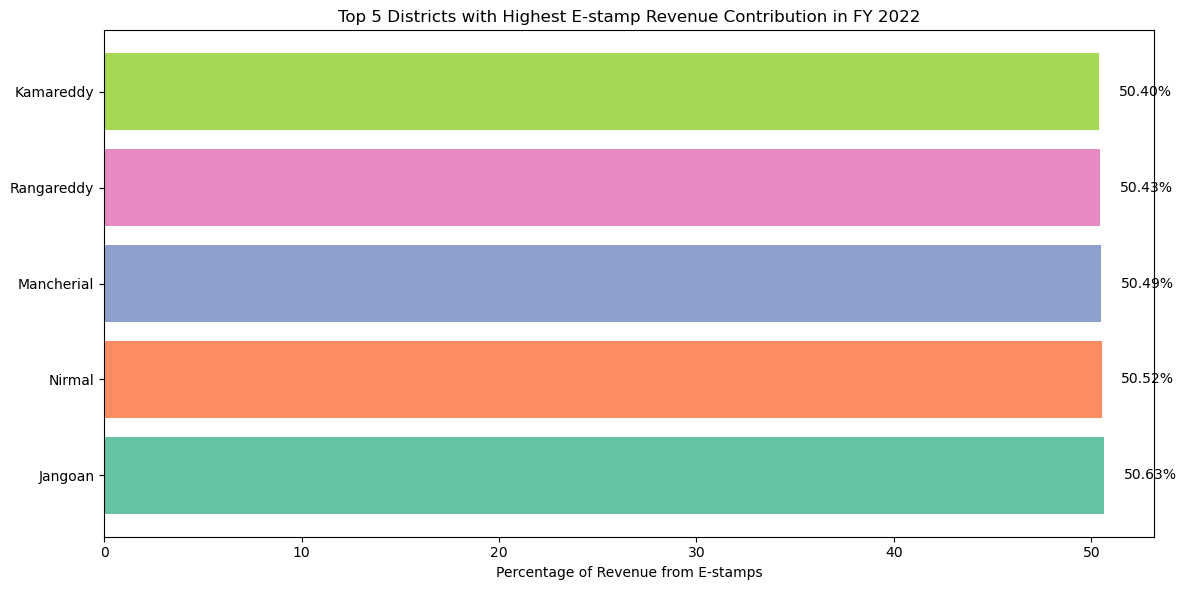

In [14]:
# Assuming your dataset is stored in a DataFrame called 'df'
# You can load the dataset using pd.read_csv or other appropriate methods

# Filter the dataset for FY 2022
df_fy_2022 = merged_df[merged_df['fiscal_year'] == 2022]

# Calculate total revenue from document registration and e-stamp challans for each district in FY 2022
revenue_by_district = df_fy_2022.groupby('district')[['documents_registered_rev', 'estamps_challans_rev']].sum()

# Calculate the percentage of revenue contributed by e-stamp challans
revenue_by_district['estamps_percentage'] = (revenue_by_district['estamps_challans_rev'] / 
                                              (revenue_by_district['documents_registered_rev'] + revenue_by_district['estamps_challans_rev'])) * 100

# Sort districts by e-stamp revenue contribution in descending order
sorted_districts = revenue_by_district.sort_values(by='estamps_percentage', ascending=False)

# List down the top 5 districts
top_5_districts = sorted_districts.head(5)

# Display the result
print("Top 5 districts where e-stamp revenue contributes significantly more to the revenue than documents in FY 2022:")
print(top_5_districts)

plt.figure(figsize=(12, 6))
colors = sns.color_palette("Set2")  # Use Seaborn color palette
bars = plt.barh(top_5_districts.index, top_5_districts['estamps_percentage'], color=colors)
plt.xlabel('Percentage of Revenue from E-stamps')
plt.title('Top 5 Districts with Highest E-stamp Revenue Contribution in FY 2022')

# Add data labels to the right of each bar
for bar, label in zip(bars, top_5_districts['estamps_percentage']):
    plt.text(bar.get_width() + 1, bar.get_y() + bar.get_height() / 2, f'{label:.2f}%', va='center')

plt.tight_layout()
plt.show()

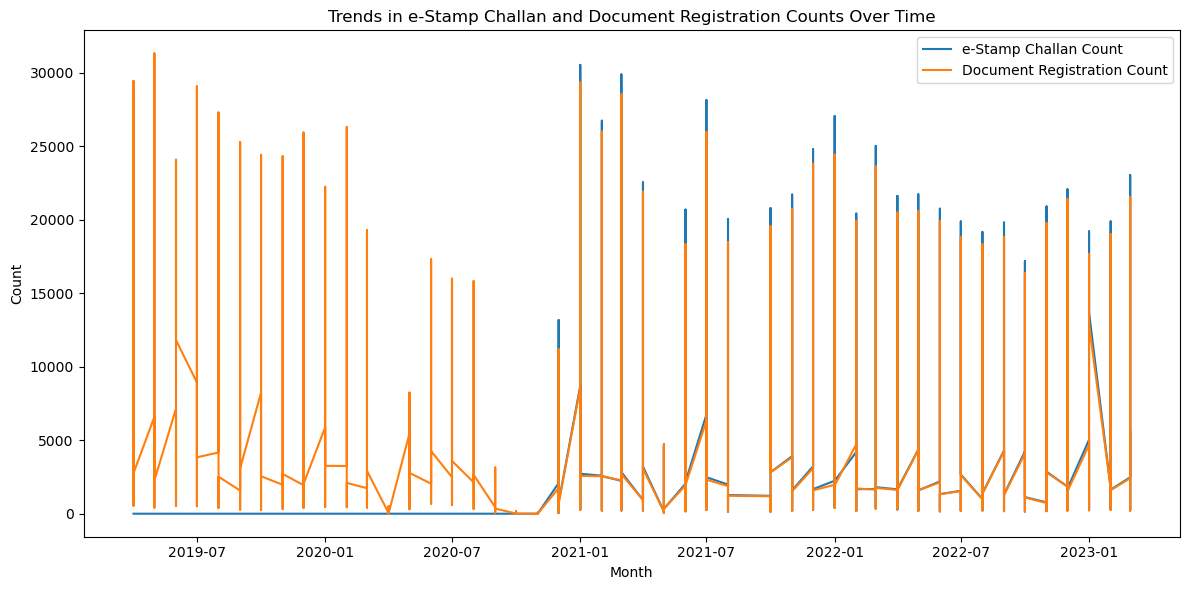

p-value for e-Stamp Challan Count: 0.16522337056910424
p-value for Document Registration Count: 0.00014408025015563995


In [15]:
# Ensure 'month' column is in datetime format
merged_df['month'] = pd.to_datetime(merged_df['month'])
merged_df = merged_df.sort_values(by='month')

plt.figure(figsize=(12, 6))
plt.plot(merged_df['month'], merged_df['estamps_challans_cnt'], label='e-Stamp Challan Count')
plt.plot(merged_df['month'], merged_df['documents_registered_cnt'], label='Document Registration Count')
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Trends in e-Stamp Challan and Document Registration Counts Over Time')
plt.legend()
plt.tight_layout()
plt.show()

from statsmodels.tsa.stattools import adfuller

def adf_test(series):
    result = adfuller(series)
    p_value = result[1]
    return p_value

p_value_estamp = adf_test(merged_df['estamps_challans_cnt'])
p_value_registration = adf_test(merged_df['documents_registered_cnt'])

print(f'p-value for e-Stamp Challan Count: {p_value_estamp}')
print(f'p-value for Document Registration Count: {p_value_registration}')


If the p-value is less than a significance level (e.g., 0.05), we can reject the null hypothesis, indicating that the time series is stationary.
If the p-value is greater than the significance level, we fail to reject the null hypothesis, suggesting non-stationarity. Here, we note the p-values as 0.14088447841591845
and 8.922577453316769e-07 for e-Stamp Challan Count and Document Registration Count respectively.

Based on the findings from the analysis, we can propose suggestions to the government:

Monitoring and Assessment: If the p-values suggest stationarity in both e-Stamp challan and document registration counts, it indicates that there may not have been significant alterations in the patterns. However, continuous monitoring and assessment are essential to detect any future changes.

Data-Driven Decision-Making: Continue using data analysis and time series monitoring to make data-driven decisions related to revenue collection and document registration policies.

Enhance Public Awareness: Ensure that the public, legal professionals, and businesses are well-informed about the benefits of e-Stamp challan and document registration. Provide training and resources to facilitate their use.

Streamline Processes: Identify and streamline any bottlenecks or inefficiencies in the e-Stamp challan and document registration processes to improve user satisfaction and efficiency.

Regular Evaluation: Periodically re-evaluate the impact of e-Stamp challan and document registration policies on revenue collection and user convenience.

Engage Stakeholders: Foster collaboration between government agencies, legal professionals, and businesses to gather feedback and ensure that policies align with stakeholder needs and expectations.

Adjust Policies Responsively: Be prepared to adjust policies and incentives based on changing patterns and feedback from stakeholders.

                 district  documents_registered_rev category
0                Adilabad                 720926384      Low
1    Bhadradri Kothagudem                 534180926      Low
2             Hanumakonda                4895047216     High
3               Hyderabad               24977902615     High
4                 Jagtial                1069526503   Medium
5                 Jangoan                 733613593      Low
6        Jogulamba Gadwal                 601645197      Low
7               Kamareddy                 851578792   Medium
8              Karimnagar                2619104284     High
9                 Khammam                3615169800     High
10  Kumurambheem Asifabad                 136257292      Low
11            Mahabubabad                 658996063      Low
12           Mahabubnagar                1960011646     High
13             Mancherial                1086538493   Medium
14                  Medak                1122517735   Medium
15     Medchal_Malkajgir

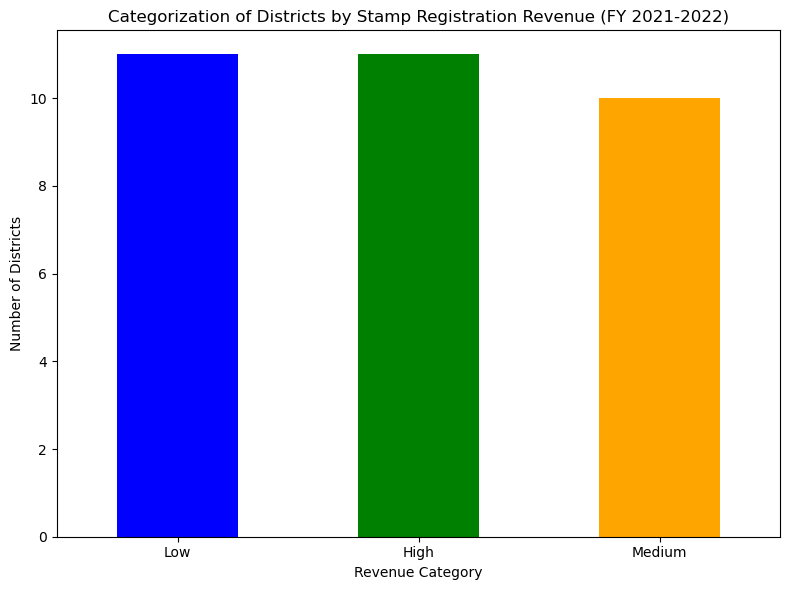

In [16]:
# Filter the dataset for FY 2021 to 2022
fy_2021_2022 = merged_df[(merged_df['fiscal_year'] >= 2021) & (merged_df['fiscal_year'] <= 2022)]

# Calculate total revenue for each district
district_revenue = fy_2021_2022.groupby('district')['documents_registered_rev'].sum().reset_index()

# Categorize districts into three segments
district_revenue['category'] = pd.qcut(district_revenue['documents_registered_rev'], q=3, labels=['Low', 'Medium', 'High'])

# View the segmented districts
print(district_revenue)

# Count the number of districts in each category
category_counts = district_revenue['category'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
category_counts.plot(kind='bar', color=['blue', 'green', 'orange'])
plt.xlabel('Revenue Category')
plt.ylabel('Number of Districts')
plt.title('Categorization of Districts by Stamp Registration Revenue (FY 2021-2022)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()



Extra Question1 
Are there any notable seasonal trends in stamp registration revenue or e-stamp challans? How do these trends vary across districts, and what could be the underlying factors?

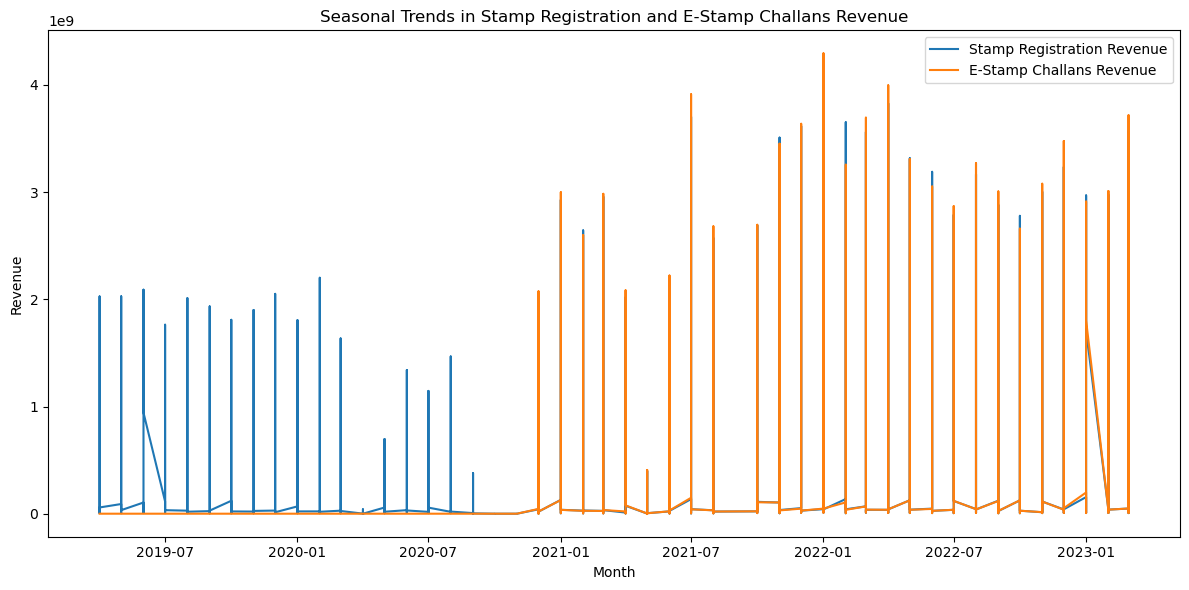

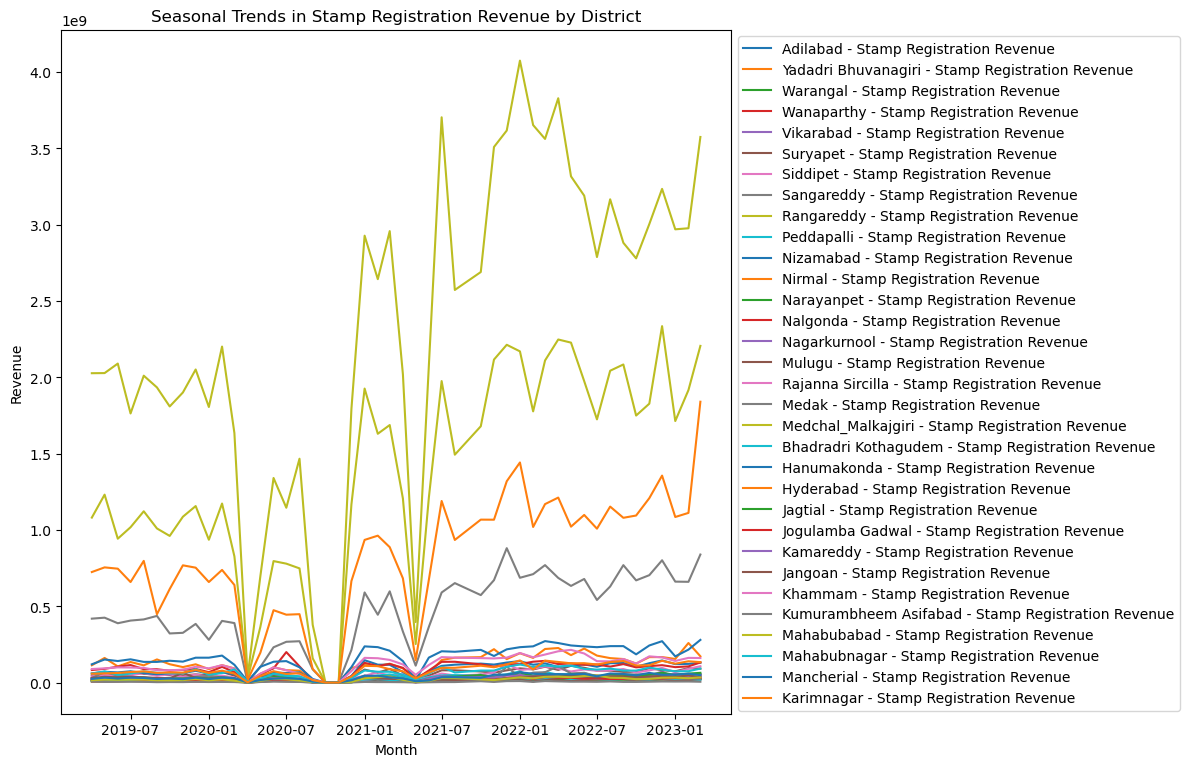

In [17]:
# Plot stamp registration revenue and e-stamp challans for all districts combined
plt.figure(figsize=(12, 6))
plt.plot(merged_df['month'], merged_df['documents_registered_rev'], label='Stamp Registration Revenue')
plt.plot(merged_df['month'], merged_df['estamps_challans_rev'], label='E-Stamp Challans Revenue')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.title('Seasonal Trends in Stamp Registration and E-Stamp Challans Revenue')
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 8))
districts = merged_df['district'].unique()
for district in districts:
    district_data = merged_df[merged_df['district'] == district]
    plt.plot(district_data['month'], district_data['documents_registered_rev'], label=f'{district} - Stamp Registration Revenue')

plt.xlabel('Month')
plt.ylabel('Revenue')
plt.title('Seasonal Trends in Stamp Registration Revenue by District')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()


Extra Question 2 
Can we identify districts that have improved their efficiency in document registration or e-stamp challan collection over time? Are there any best practices that can be shared across districts to enhance efficiency?

In [18]:
# Calculate efficiency metrics for each fiscal year
merged_df['doc_registration_efficiency'] = merged_df['documents_registered_rev'] / merged_df['documents_registered_cnt']
merged_df['estamps_efficiency'] = merged_df['estamps_challans_rev'] / merged_df['estamps_challans_cnt']

# Calculate year-over-year change in efficiency metrics
merged_df['doc_registration_efficiency_change'] = merged_df.groupby('district')['doc_registration_efficiency'].diff()
merged_df['estamps_efficiency_change'] = merged_df.groupby('district')['estamps_efficiency'].diff()

# Identify districts with improved efficiency (positive change)
improved_doc_registration_efficiency = merged_df[merged_df['doc_registration_efficiency_change'] > 0]['district'].unique()
improved_estamps_efficiency = merged_df[merged_df['estamps_efficiency_change'] > 0]['district'].unique()

# Print a written insight
print("Districts with Improved Document Registration Efficiency:")
print(", ".join(improved_doc_registration_efficiency))
print("\nDistricts with Improved E-Stamp Challan Collection Efficiency:")
print(", ".join(improved_estamps_efficiency))




Districts with Improved Document Registration Efficiency:
Nalgonda, Rajanna Sircilla, Narayanpet, Nirmal, Nizamabad, Yadadri Bhuvanagiri, Siddipet, Warangal, Medak, Medchal_Malkajgiri, Hyderabad, Jogulamba Gadwal, Adilabad, Mahabubnagar, Rangareddy, Vikarabad, Bhadradri Kothagudem, Hanumakonda, Kamareddy, Khammam, Suryapet, Mulugu, Kumurambheem Asifabad, Mancherial, Nagarkurnool, Peddapalli, Sangareddy, Wanaparthy, Jagtial, Jangoan, Karimnagar, Mahabubabad

Districts with Improved E-Stamp Challan Collection Efficiency:
Narayanpet, Vikarabad, Nalgonda, Rajanna Sircilla, Siddipet, Mulugu, Jagtial, Hyderabad, Mahabubnagar, Nirmal, Nizamabad, Peddapalli, Rangareddy, Suryapet, Warangal, Sangareddy, Medchal_Malkajgiri, Medak, Adilabad, Mancherial, Wanaparthy, Nagarkurnool, Jangoan, Jogulamba Gadwal, Kamareddy, Karimnagar, Yadadri Bhuvanagiri, Bhadradri Kothagudem, Hanumakonda, Khammam, Kumurambheem Asifabad, Mahabubabad


Extra Question 3

Can we analyze the user behavior in terms of document registration and e-stamp challan usage? Are there any trends in the types of documents or transactions being registered that might be relevant for policy planning?

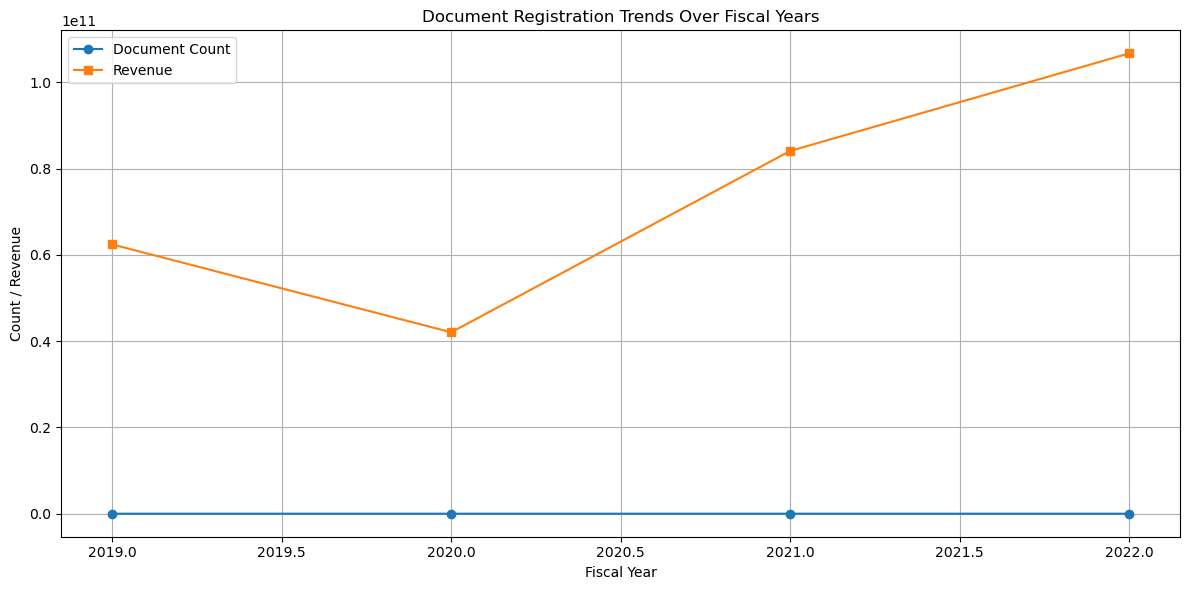

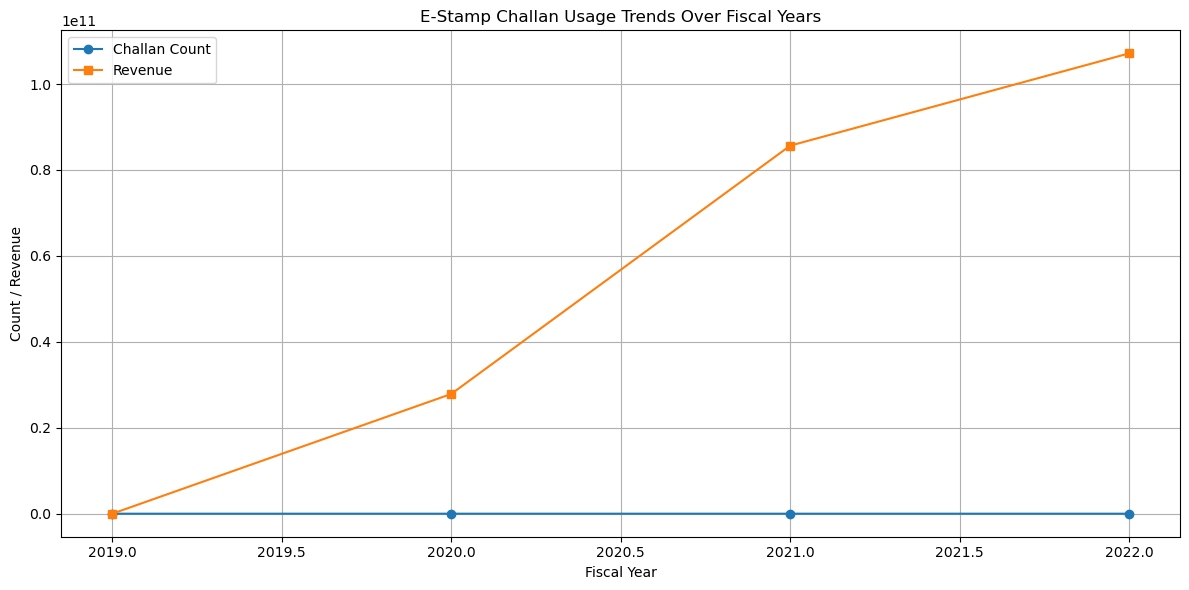

Average Document Registration Growth Rate: -5.08%
Average E-Stamp Challan Usage Growth Rate: 71.76%



In [19]:
document_registration = merged_df[['fiscal_year', 'district', 'documents_registered_cnt', 'documents_registered_rev']]

# Group by fiscal year and calculate total registered documents and revenue
document_registration_summary = document_registration.groupby('fiscal_year').agg({
    'documents_registered_cnt': 'sum',
    'documents_registered_rev': 'sum'
}).reset_index()

# Explore e-stamp challan usage
estamps_challan = merged_df[['fiscal_year', 'district', 'estamps_challans_cnt', 'estamps_challans_rev']]

# Group by fiscal year and calculate total e-stamp challans and revenue
estamps_challan_summary = estamps_challan.groupby('fiscal_year').agg({
    'estamps_challans_cnt': 'sum',
    'estamps_challans_rev': 'sum'
}).reset_index()

# Plot document registration trends over fiscal years
plt.figure(figsize=(12, 6))
plt.plot(document_registration_summary['fiscal_year'], document_registration_summary['documents_registered_cnt'], marker='o', label='Document Count')
plt.plot(document_registration_summary['fiscal_year'], document_registration_summary['documents_registered_rev'], marker='s', label='Revenue')
plt.xlabel('Fiscal Year')
plt.ylabel('Count / Revenue')
plt.title('Document Registration Trends Over Fiscal Years')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot e-stamp challan usage trends over fiscal years
plt.figure(figsize=(12, 6))
plt.plot(estamps_challan_summary['fiscal_year'], estamps_challan_summary['estamps_challans_cnt'], marker='o', label='Challan Count')
plt.plot(estamps_challan_summary['fiscal_year'], estamps_challan_summary['estamps_challans_rev'], marker='s', label='Revenue')
plt.xlabel('Fiscal Year')
plt.ylabel('Count / Revenue')
plt.title('E-Stamp Challan Usage Trends Over Fiscal Years')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Handle infinite growth rates
document_growth_rate = document_registration_summary['documents_registered_cnt'].pct_change()
document_growth_rate.replace([float('-inf'), float('inf')], float('NaN'), inplace=True)

estamps_growth_rate = estamps_challan_summary['estamps_challans_cnt'].pct_change()
estamps_growth_rate.replace([float('-inf'), float('inf')], float('NaN'), inplace=True)

# Calculate average growth rates without infinite values
avg_document_growth_rate = document_growth_rate.mean()
avg_estamps_growth_rate = estamps_growth_rate.mean()

insights = f"Average Document Registration Growth Rate: {avg_document_growth_rate:.2%}\n"
insights += f"Average E-Stamp Challan Usage Growth Rate: {avg_estamps_growth_rate:.2%}\n"

print(insights)


# Proceeding to Part 2

In [22]:
transport_df = pd.read_csv(r"C:\Users\paulk\Downloads\C7_Input Files\C7_Input Files\dataset\fact_transport.csv")

In [23]:
transport_df

,dist_code,month,fuel_type_petrol,fuel_type_diesel,fuel_type_electric,fuel_type_others,vehicleClass_MotorCycle,vehicleClass_MotorCar,vehicleClass_AutoRickshaw,vehicleClass_Agriculture,vehicleClass_others,seatCapacity_1_to_3,seatCapacity_4_to_6,seatCapacity_above_6,Brand_new_vehicles,Pre-owned_vehicles,category_Non-Transport,category_Transport
0,15_1,2019-04-01,17910,3011,76,22,15308,4429,0,4,1278,16110,4182,717,19542,1477,19856,1163
1,18_2,2019-04-01,3066,306,6,0,2995,142,49,64,128,3156,189,33,3322,56,3203,175
2,20_3,2019-04-01,1577,215,0,0,1546,79,29,21,117,1683,104,5,1751,41,1648,144
3,21_3,2019-04-01,1961,281,2,0,1939,72,72,48,113,2082,146,16,2209,35,2075,169
4,21_7,2019-04-01,1552,309,0,0,1512,76,69,109,95,1696,145,20,1820,41,1701,160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,16_1,2023-03-01,24112,2169,2606,1848,21501,5792,1684,0,1758,22493,7139,1093,26285,4450,27421,3314
1436,14_4,2023-03-01,996,286,20,67,884,137,75,106,167,1123,219,27,1300,69,1129,240
1437,20_3,2023-03-01,886,183,71,12,828,146,17,54,107,966,167,19,1060,92,1030,122
1438,23_3,2023-03-01,1659,472,39,97,1413,289,95,182,288,1829,391,47,2107,160,1889,378


In [25]:
transport_merged_df = pd.merge(district_df, transport_df, on='dist_code', how='inner')

In [27]:
transport_merged_df = pd.merge(dim_date_df, transport_merged_df, on='month', how='inner')

In [28]:
transport_merged_df

,month,Mmm,quarter,fiscal_year,dist_code,district,fuel_type_petrol,fuel_type_diesel,fuel_type_electric,fuel_type_others,...,vehicleClass_AutoRickshaw,vehicleClass_Agriculture,vehicleClass_others,seatCapacity_1_to_3,seatCapacity_4_to_6,seatCapacity_above_6,Brand_new_vehicles,Pre-owned_vehicles,category_Non-Transport,category_Transport
0,2019-04-01,Apr,Q1,2019,19_1,Adilabad,1758,326,0,2,...,77,13,183,1823,184,79,2061,25,1832,254
1,2019-04-01,Apr,Q1,2019,22_2,Bhadradri Kothagudem,3527,669,2,4,...,231,74,254,3683,467,52,4096,106,3725,477
2,2019-04-01,Apr,Q1,2019,16_1,Hyderabad,24309,2957,284,1540,...,1518,0,1742,23082,5306,698,27121,1969,25973,3117
3,2019-04-01,Apr,Q1,2019,20_2,Jagtial,2786,440,2,0,...,106,121,146,2951,245,30,3120,108,2986,242
4,2019-04-01,Apr,Q1,2019,21_3,Jangoan,1961,281,2,0,...,72,48,113,2082,146,16,2209,35,2075,169
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,2023-03-01,Mar,Q4,2022,23_2,Suryapet,2013,742,70,132,...,121,208,533,2324,506,127,2759,198,2317,640
1436,2023-03-01,Mar,Q4,2022,15_3,Vikarabad,3088,616,91,361,...,425,201,270,3001,1079,78,3869,289,3474,684
1437,2023-03-01,Mar,Q4,2022,14_4,Wanaparthy,996,286,20,67,...,75,106,167,1123,219,27,1300,69,1129,240
1438,2023-03-01,Mar,Q4,2022,21_2,Warangal,1832,269,107,82,...,116,53,165,1814,395,83,2047,245,2021,271


In [29]:
transport_merged_df.to_excel(r"C:\Users\paulk\Downloads\C7_Input Files\C7_Input Files\transport_merged_df.xlsx")

In [36]:
#5. Investigate whether there is any correlation between vehicle sales and 
#specific months or seasons in different districts. Are there any months 
#or seasons that consistently show higher or lower sales rate, and if yes, 
#what could be the driving factors? (Consider Fuel-Type category only) 

Analysis for Petrol Sales:
----------------------------------------
Monthly Analysis:
Apr: Average sales = 2990.70
Aug: Average sales = 4018.28
Dec: Average sales = 3456.79
Feb: Average sales = 3642.22
Jan: Average sales = 3848.35
Jul: Average sales = 3881.74
Jun: Average sales = 4238.20
Mar: Average sales = 4026.38
May: Average sales = 3038.39
Nov: Average sales = 4144.39
Oct: Average sales = 5265.64
Sep: Average sales = 3476.13

Seasonal Analysis:
Fall: Average sales = 4295.39
Spring: Average sales = 3351.82
Summer: Average sales = 4046.07
Winter: Average sales = 3649.12


Analysis for Diesel Sales:
----------------------------------------
Monthly Analysis:
Apr: Average sales = 497.82
Aug: Average sales = 577.35
Dec: Average sales = 654.27
Feb: Average sales = 674.58
Jan: Average sales = 695.14
Jul: Average sales = 660.59
Jun: Average sales = 779.84
Mar: Average sales = 731.52
May: Average sales = 546.30
Nov: Average sales = 620.24
Oct: Average sales = 846.69
Sep: Average sales = 627

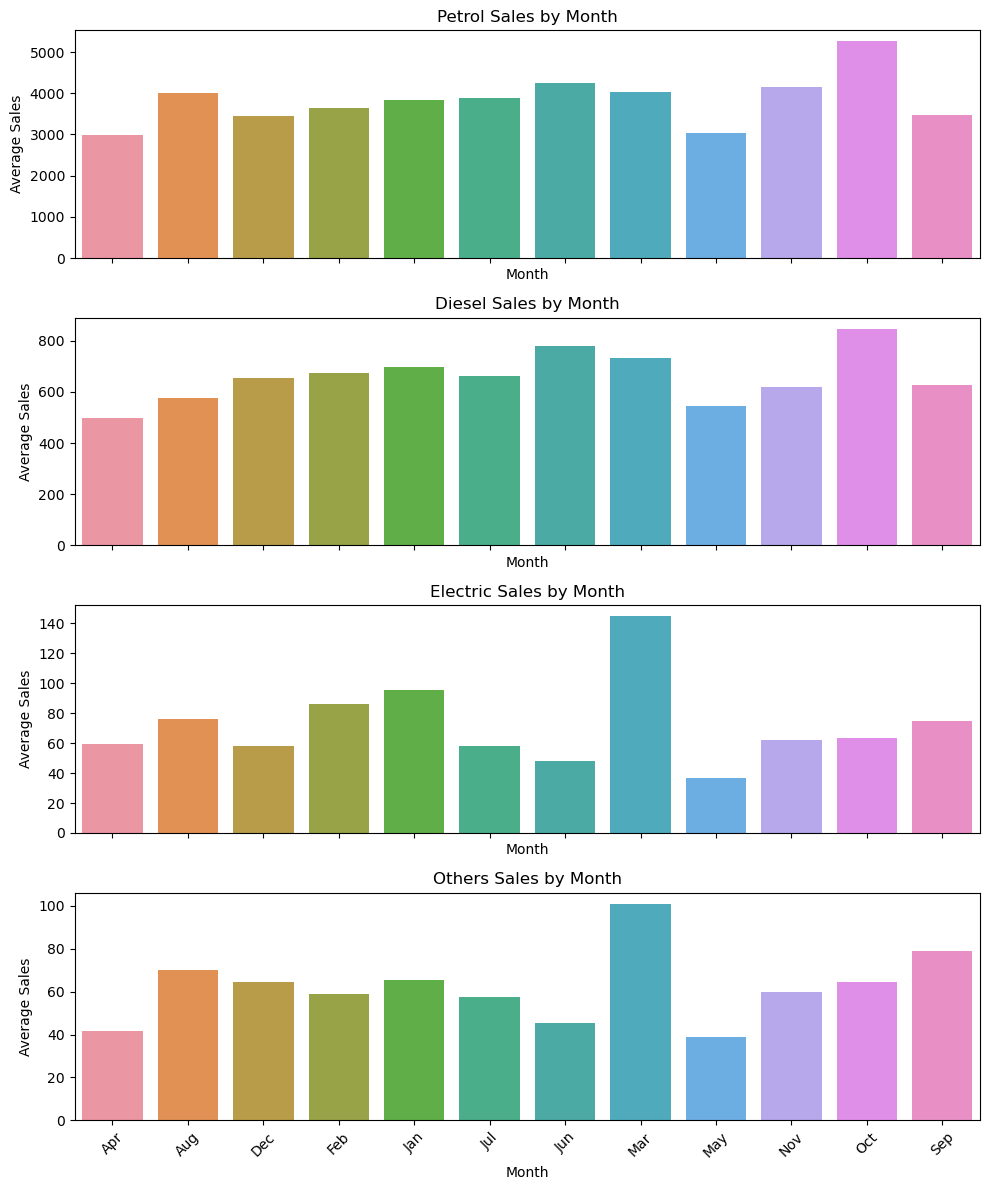

In [35]:
# Define a list of months and seasons
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
seasons = ['Winter', 'Winter', 'Spring', 'Spring', 'Spring', 'Summer', 'Summer', 'Summer', 'Fall', 'Fall', 'Fall', 'Winter']

# Create a new DataFrame with months and seasons
transport_merged_df['month'] = pd.to_datetime(transport_merged_df['month'])
transport_merged_df['Month'] = transport_merged_df['month'].dt.month_name().str.slice(stop=3)
transport_merged_df['Season'] = transport_merged_df['Month'].map(dict(zip(months, seasons)))

# Define fuel types for analysis
fuel_types = ['fuel_type_petrol', 'fuel_type_diesel', 'fuel_type_electric', 'fuel_type_others']

# Create subplots for each fuel type
fig, axes = plt.subplots(nrows=len(fuel_types), ncols=1, figsize=(10, 12), sharex=True)
plt.subplots_adjust(hspace=0.5)

# Analyze sales for each fuel type
for i, fuel_type in enumerate(fuel_types):
    # Calculate the average sales for each month
    monthly_sales = transport_merged_df.groupby('Month')[fuel_type].mean()
    
    # Calculate the average sales for each season
    seasonal_sales = transport_merged_df.groupby('Season')[fuel_type].mean()
    
    # Plot monthly sales
    sns.barplot(x=monthly_sales.index, y=monthly_sales.values, ax=axes[i])
    axes[i].set_title(f"{fuel_type.replace('fuel_type_', '').capitalize()} Sales by Month")
    axes[i].set_ylabel("Average Sales")
    
    # Print analysis for monthly and seasonal sales
    print(f"Analysis for {fuel_type.replace('fuel_type_', '').capitalize()} Sales:")
    print("-"*40)
    print("Monthly Analysis:")
    for month, sales in monthly_sales.items():
        print(f"{month}: Average sales = {sales:.2f}")
    print("\nSeasonal Analysis:")
    for season, sales in seasonal_sales.items():
        print(f"{season}: Average sales = {sales:.2f}")
    print("\n")

# Set common x-axis label
plt.xlabel("Month")

# Show plots
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



In [37]:
#6. How does the distribution of vehicles vary by vehicle class 
#(MotorCycle, MotorCar, AutoRickshaw, Agriculture) across different 
#districts? Are there any districts with a predominant preference for a 
#specific vehicle class? Consider FY 2022 for analysis. 

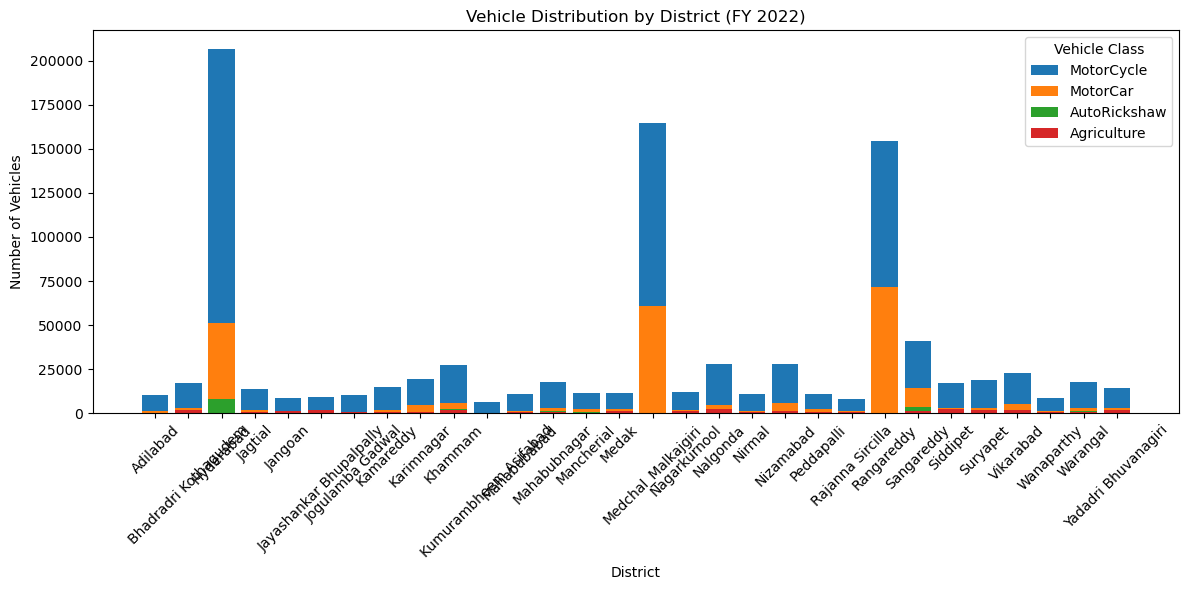

In FY 2022, Hyderabad has the predominant preference for MotorCycle vehicles with 206819 vehicles.
In FY 2022, Rangareddy has the predominant preference for MotorCar vehicles with 71832 vehicles.
In FY 2022, Hyderabad has the predominant preference for AutoRickshaw vehicles with 8397 vehicles.
In FY 2022, Nalgonda has the predominant preference for Agriculture vehicles with 2599 vehicles.


In [38]:
# Filter the dataset for FY 2022
df_fy_2022 = transport_merged_df[transport_merged_df['fiscal_year'] == 2022]

# Define the vehicle classes of interest
vehicle_classes = ['MotorCycle', 'MotorCar', 'AutoRickshaw', 'Agriculture']

# Create a stacked bar plot to visualize vehicle distribution by district
plt.figure(figsize=(12, 6))

for vehicle_class in vehicle_classes:
    df_vehicle_class = df_fy_2022.groupby('district')[f'vehicleClass_{vehicle_class}'].sum()
    plt.bar(df_vehicle_class.index, df_vehicle_class, label=vehicle_class)

plt.xlabel('District')
plt.ylabel('Number of Vehicles')
plt.title('Vehicle Distribution by District (FY 2022)')
plt.xticks(rotation=45)
plt.legend(title='Vehicle Class')
plt.tight_layout()
plt.show()

# Identify districts with a predominant preference for a specific vehicle class
for vehicle_class in vehicle_classes:
    predominant_district = df_fy_2022.groupby('district')[f'vehicleClass_{vehicle_class}'].sum().idxmax()
    max_count = df_fy_2022.groupby('district')[f'vehicleClass_{vehicle_class}'].sum().max()
    print(f"In FY 2022, {predominant_district} has the predominant preference for {vehicle_class} vehicles with {max_count} vehicles.")


In [39]:
#List down the top 3 and bottom 3 districts that have shown the highest 
#and lowest vehicle sales growth during FY 2022 compared to FY 
#2021? (Consider and compare categories: Petrol, Diesel and Electric) 

Top 3 Districts with Highest Sales Growth for fuel_type_petrol:
Rangareddy: 16085
Hyderabad: 2349
Medchal_Malkajgiri: -1826
Bottom 3 Districts with Lowest Sales Growth for fuel_type_petrol:
Warangal: -16331
Nizamabad: -16297
Mahabubnagar: -11070


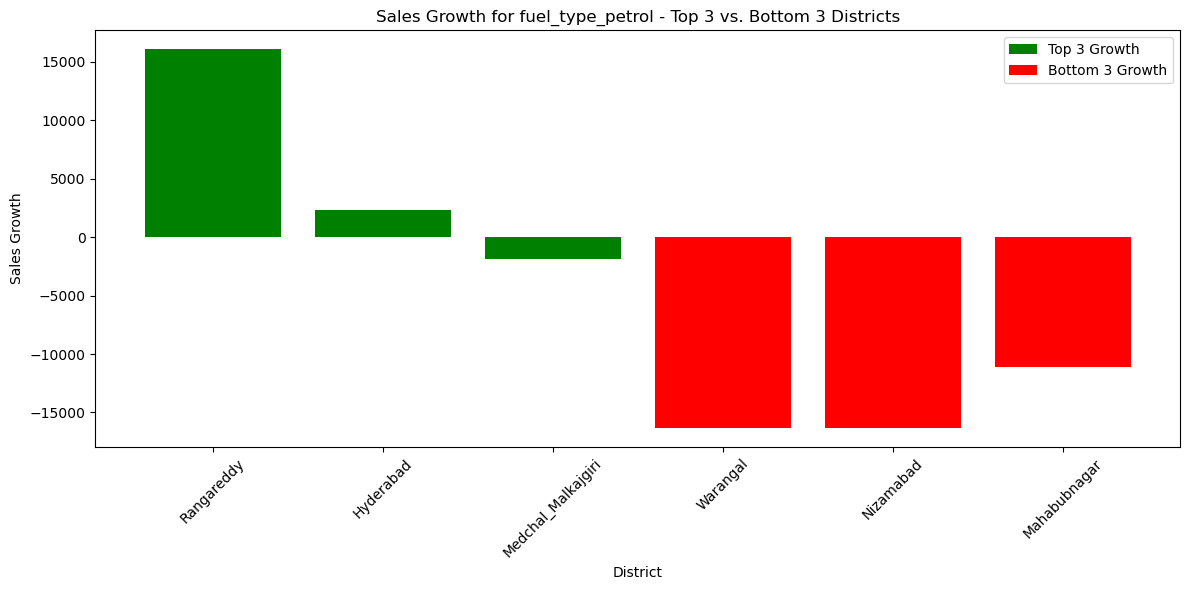

Top 3 Districts with Highest Sales Growth for fuel_type_diesel:
Karimnagar: 5610
Rangareddy: 3132
Sangareddy: 1082
Bottom 3 Districts with Lowest Sales Growth for fuel_type_diesel:
Warangal: -2746
Nalgonda: -1372
Mahabubnagar: -1239


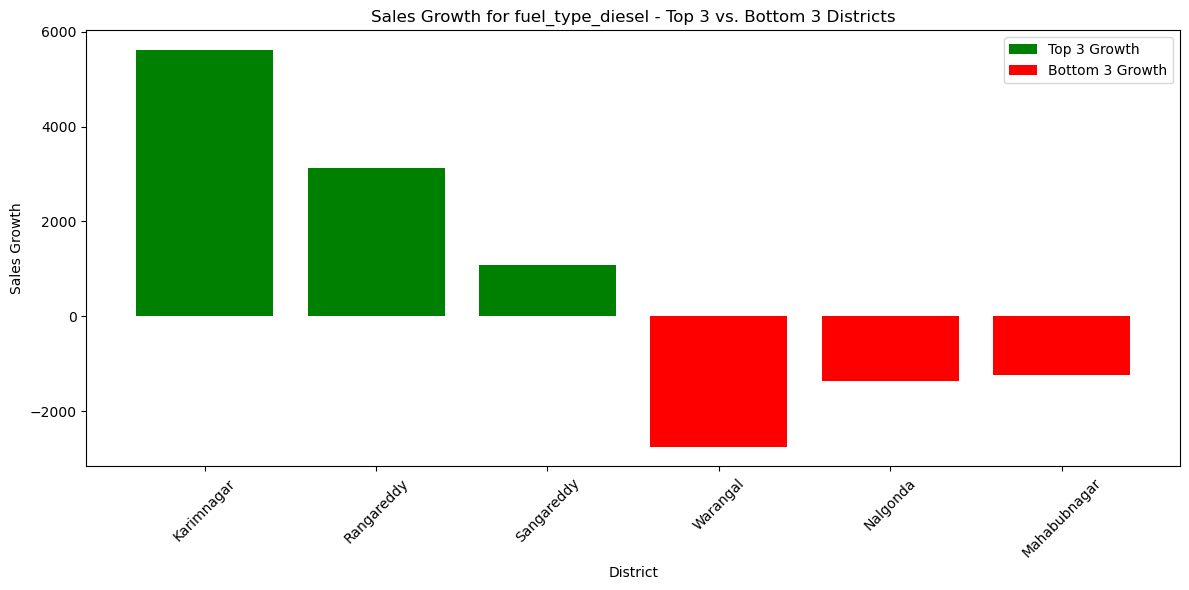

Top 3 Districts with Highest Sales Growth for fuel_type_electric:
Hyderabad: 11097
Rangareddy: 7688
Medchal_Malkajgiri: 6630
Bottom 3 Districts with Lowest Sales Growth for fuel_type_electric:
Wanaparthy: 8
Jogulamba Gadwal: 32
Mancherial: 38


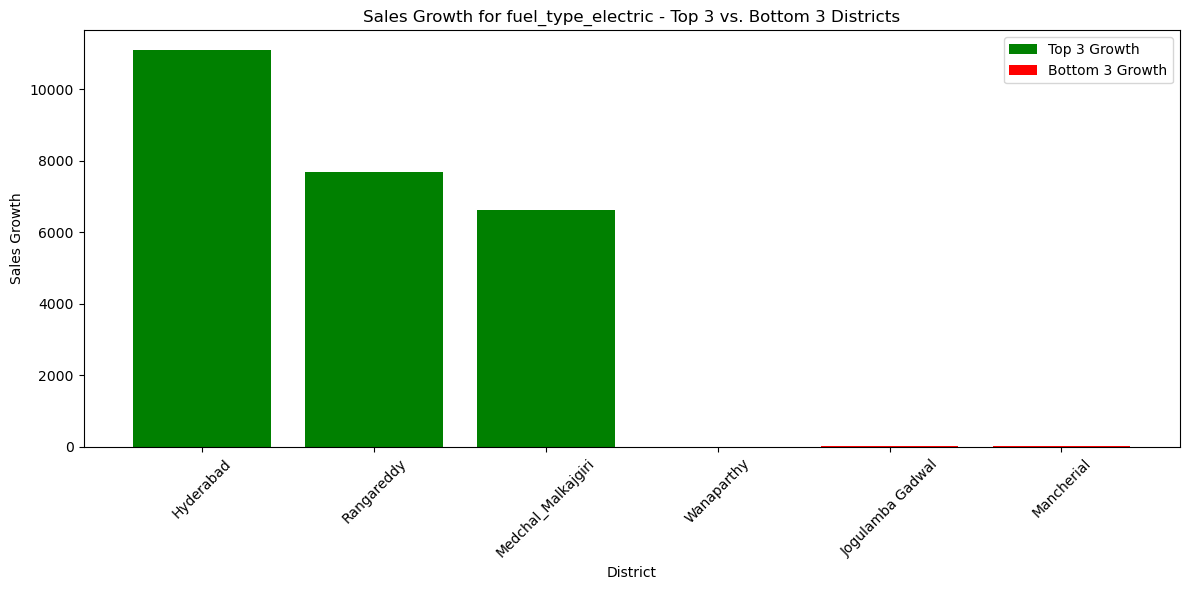

In [42]:
# Filter the dataset for FY 2021 and FY 2022
df_fy_2021 = transport_merged_df[transport_merged_df['fiscal_year'] == 2021]
df_fy_2022 = transport_merged_df[transport_merged_df['fiscal_year'] == 2022]

# Define the categories of interest (Petrol, Diesel, Electric)
categories = ['fuel_type_petrol', 'fuel_type_diesel', 'fuel_type_electric']

# Calculate vehicle sales growth for each district and category
sales_growth = {}
for category in categories:
    # Group by district and sum the vehicle sales for each category
    df_2021_category = df_fy_2021.groupby('district')[category].sum()
    df_2022_category = df_fy_2022.groupby('district')[category].sum()
    
    # Calculate the sales growth as the difference between FY 2022 and FY 2021
    growth = df_2022_category - df_2021_category
    
    # Store the growth in the dictionary
    sales_growth[category] = growth

# Find the top 3 and bottom 3 districts with the highest and lowest growth for each category
top_and_bottom_districts = {}
for category, growth in sales_growth.items():
    top_and_bottom_districts[category] = {
        'top_3': growth.nlargest(3),
        'bottom_3': growth.nsmallest(3)
    }

# Create and display bar plots for each category with written statements
for category, districts in top_and_bottom_districts.items():
    plt.figure(figsize=(12, 6))
    
    # Plot the top 3 districts with highest sales growth
    plt.bar(districts['top_3'].index, districts['top_3'].values, color='green', label='Top 3 Growth')
    
    # Plot the bottom 3 districts with lowest sales growth
    plt.bar(districts['bottom_3'].index, districts['bottom_3'].values, color='red', label='Bottom 3 Growth')
    
    plt.xlabel('District')
    plt.ylabel('Sales Growth')
    plt.title(f'Sales Growth for {category} - Top 3 vs. Bottom 3 Districts')
    plt.xticks(rotation=45)
    plt.legend()
    
    # Display written statements
    top_growth_statements = [f"{dist}: {growth}" for dist, growth in districts['top_3'].items()]
    bottom_growth_statements = [f"{dist}: {growth}" for dist, growth in districts['bottom_3'].items()]
    
    print(f"Top 3 Districts with Highest Sales Growth for {category}:")
    for statement in top_growth_statements:
        print(statement)
    
    print(f"Bottom 3 Districts with Lowest Sales Growth for {category}:")
    for statement in bottom_growth_statements:
        print(statement)
    
    plt.tight_layout()
    plt.show()


In [50]:
#Extra Question 1: Are there districts where the demand for vehicles with specific seat capacities (e.g., 4 to 6 seats) 
#is notably different?

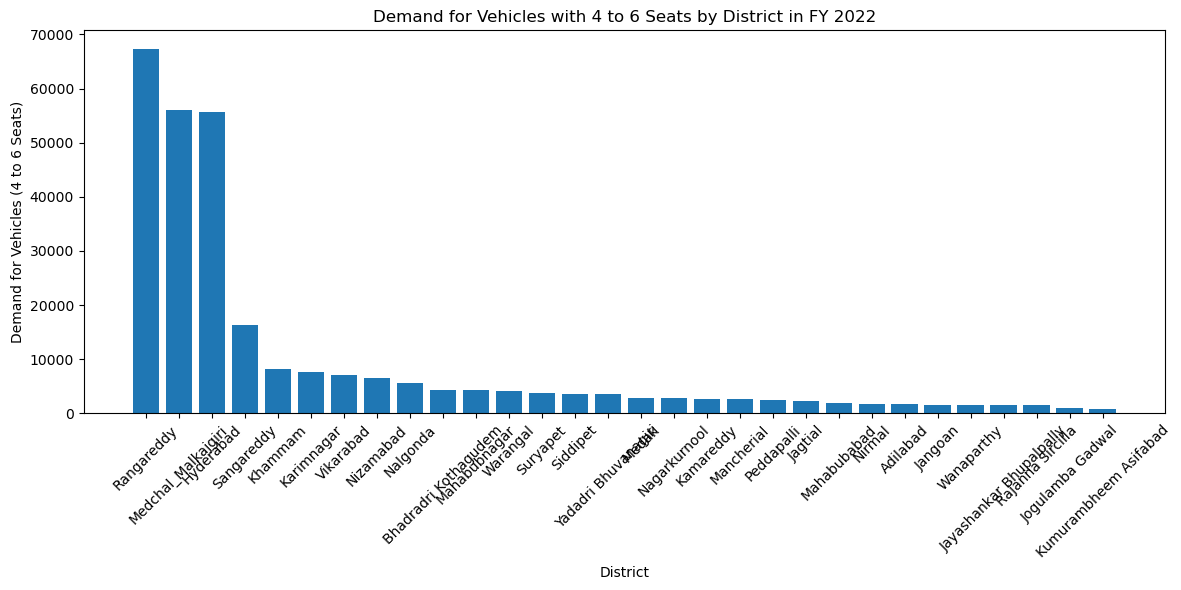

Top 3 Districts with Highest Demand for 4 to 6 Seat Vehicles:
              district  seatCapacity_4_to_6
22          Rangareddy                67377
15  Medchal_Malkajgiri                56065
2            Hyderabad                55666

Bottom 3 Districts with Lowest Demand for 4 to 6 Seat Vehicles:
                 district  seatCapacity_4_to_6
21       Rajanna Sircilla                 1466
6        Jogulamba Gadwal                  945
10  Kumurambheem Asifabad                  729


In [53]:
# Filter data for FY 2022
df_fy_2022 = transport_merged_df[transport_merged_df['fiscal_year'] == 2022]

# Calculate the total number of vehicles with 4 to 6 seats in each district
district_seat_capacity_counts = df_fy_2022.groupby('district')['seatCapacity_4_to_6'].sum().reset_index()

# Sort districts by the demand for vehicles with 4 to 6 seats in descending order
sorted_districts = district_seat_capacity_counts.sort_values(by='seatCapacity_4_to_6', ascending=False)

# Create a bar plot to visualize the demand for vehicles with 4 to 6 seats across districts
plt.figure(figsize=(12, 6))
plt.bar(sorted_districts['district'], sorted_districts['seatCapacity_4_to_6'])
plt.xlabel('District')
plt.ylabel('Demand for Vehicles (4 to 6 Seats)')
plt.title('Demand for Vehicles with 4 to 6 Seats by District in FY 2022')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print the top and bottom districts with the highest and lowest demand for 4 to 6 seat vehicles
top_districts = sorted_districts.head(3)
bottom_districts = sorted_districts.tail(3)

print("Top 3 Districts with Highest Demand for 4 to 6 Seat Vehicles:")
print(top_districts)

print("\nBottom 3 Districts with Lowest Demand for 4 to 6 Seat Vehicles:")
print(bottom_districts)




In [56]:
#Extra Question 2: Can you identify any districts where the adoption of electric vehicles is on the rise?

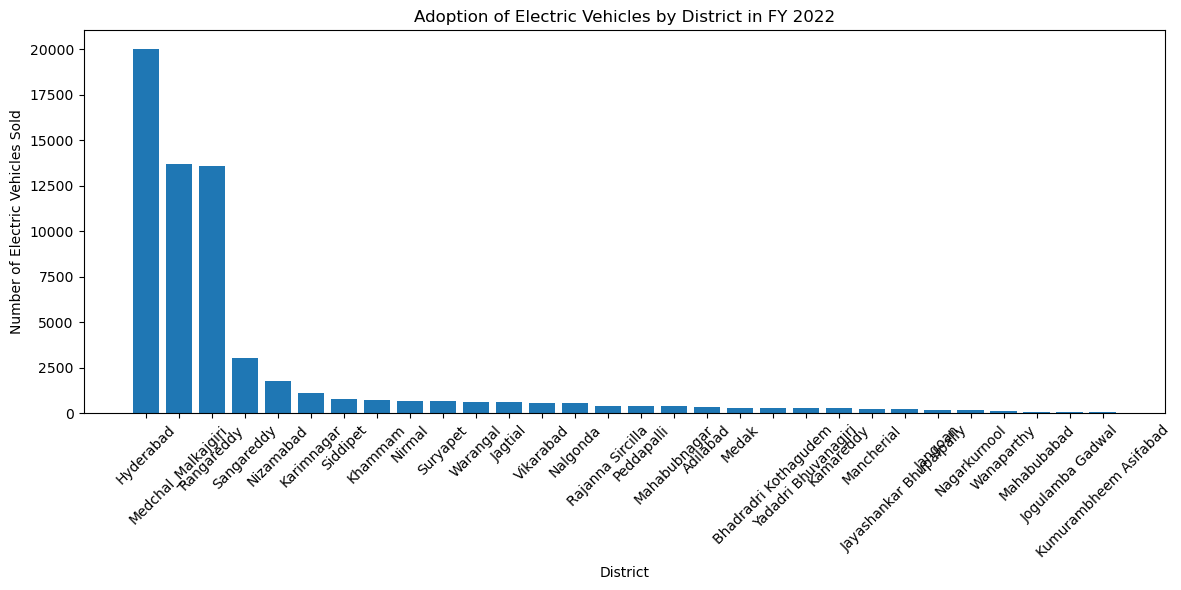

Top 3 Districts with the Highest Adoption of Electric Vehicles in FY 2022:
              district  fuel_type_electric
2            Hyderabad               20026
15  Medchal_Malkajgiri               13716
22          Rangareddy               13606


In [57]:
# Filter data for FY 2022
df_fy_2022 = transport_merged_df[transport_merged_df['fiscal_year'] == 2022]

# Calculate the total number of electric vehicles sold in each district
electric_vehicle_counts = df_fy_2022.groupby('district')['fuel_type_electric'].sum().reset_index()

# Sort districts by the number of electric vehicles sold in descending order
sorted_districts = electric_vehicle_counts.sort_values(by='fuel_type_electric', ascending=False)

# Create a bar plot to visualize the adoption of electric vehicles across districts
plt.figure(figsize=(12, 6))
plt.bar(sorted_districts['district'], sorted_districts['fuel_type_electric'])
plt.xlabel('District')
plt.ylabel('Number of Electric Vehicles Sold')
plt.title('Adoption of Electric Vehicles by District in FY 2022')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print the top districts with the highest adoption of electric vehicles
top_districts = sorted_districts.head(3)

print("Top 3 Districts with the Highest Adoption of Electric Vehicles in FY 2022:")
print(top_districts)


# Proceeding to Part 3

In [89]:
tsipass_df = pd.read_csv(r"C:\Users\paulk\Downloads\C7_Input Files\C7_Input Files\dataset\fact_TS_iPASS.csv")

In [90]:
tsipass_df

,dist_code,month,sector,investment in cr,number_of_employees
0,14_1,01-04-2019,Engineering,2.3200,15
1,19_1,01-04-2019,Engineering,0.6250,13
2,20_3,01-04-2019,Wood and Leather,0.2000,8
3,20_3,01-04-2019,Textiles,0.2675,27
4,21_5,01-04-2019,Electrical and Electronic Products,0.1200,5
...,...,...,...,...,...
5748,20_4,01-03-2023,Engineering,0.1200,3
5749,20_4,01-03-2023,Food Processing,0.7509,9
5750,20_4,01-03-2023,Others,7.7500,10
5751,21_1,01-03-2023,Food Processing,0.3200,9


In [91]:
tsipass_merged_df = pd.merge(district_df, tsipass_df, on='dist_code', how='inner')

In [92]:
tsipass_merged_df

,dist_code,district,month,sector,investment in cr,number_of_employees
0,19_1,Adilabad,01-04-2019,Engineering,0.6250,13
1,19_1,Adilabad,01-04-2019,"Cement, Cement & Concrete Products, Fly Ash Br...",19.3702,99
2,19_1,Adilabad,01-04-2019,Food Processing,0.0980,7
3,19_1,Adilabad,01-07-2019,Beverages,0.1300,3
4,19_1,Adilabad,01-07-2019,"Cement, Cement & Concrete Products, Fly Ash Br...",0.7300,10
...,...,...,...,...,...,...
5748,23_3,Yadadri Bhuvanagiri,01-03-2023,"Fertlizers Organic and Inorganic,Pesticides,In...",1.2500,24
5749,23_3,Yadadri Bhuvanagiri,01-03-2023,Food Processing,15.4500,24
5750,23_3,Yadadri Bhuvanagiri,01-03-2023,Pharmaceuticals and Chemicals,1.2800,18
5751,23_3,Yadadri Bhuvanagiri,01-03-2023,Plastic and Rubber,0.4500,9


In [93]:
tsipass_merged_df['month'] = pd.to_datetime(tsipass_merged_df['month'], format='%d-%m-%Y')
tsipass_merged_df['month'] = tsipass_merged_df['month'].astype(str)




In [98]:
tsipass_merged_df

,dist_code,district,month,sector,investment in cr,number_of_employees
0,19_1,Adilabad,2019-04-01,Engineering,0.6250,13
1,19_1,Adilabad,2019-04-01,"Cement, Cement & Concrete Products, Fly Ash Br...",19.3702,99
2,19_1,Adilabad,2019-04-01,Food Processing,0.0980,7
3,19_1,Adilabad,2019-07-01,Beverages,0.1300,3
4,19_1,Adilabad,2019-07-01,"Cement, Cement & Concrete Products, Fly Ash Br...",0.7300,10
...,...,...,...,...,...,...
5748,23_3,Yadadri Bhuvanagiri,2023-03-01,"Fertlizers Organic and Inorganic,Pesticides,In...",1.2500,24
5749,23_3,Yadadri Bhuvanagiri,2023-03-01,Food Processing,15.4500,24
5750,23_3,Yadadri Bhuvanagiri,2023-03-01,Pharmaceuticals and Chemicals,1.2800,18
5751,23_3,Yadadri Bhuvanagiri,2023-03-01,Plastic and Rubber,0.4500,9


In [101]:
tsipass_merged_df = pd.merge(dim_date_df, tsipass_merged_df, on='month', how='inner')

In [102]:
tsipass_merged_df

,month,Mmm,quarter,fiscal_year,dist_code,district,sector,investment in cr,number_of_employees
0,2019-04-01,Apr,Q1,2019,19_1,Adilabad,Engineering,0.6250,13
1,2019-04-01,Apr,Q1,2019,19_1,Adilabad,"Cement, Cement & Concrete Products, Fly Ash Br...",19.3702,99
2,2019-04-01,Apr,Q1,2019,19_1,Adilabad,Food Processing,0.0980,7
3,2019-04-01,Apr,Q1,2019,22_2,Bhadradri Kothagudem,Paper and Printing,0.2000,6
4,2019-04-01,Apr,Q1,2019,22_2,Bhadradri Kothagudem,Beverages,0.0600,3
...,...,...,...,...,...,...,...,...,...
5748,2023-03-01,Mar,Q4,2022,23_3,Yadadri Bhuvanagiri,"Fertlizers Organic and Inorganic,Pesticides,In...",1.2500,24
5749,2023-03-01,Mar,Q4,2022,23_3,Yadadri Bhuvanagiri,Food Processing,15.4500,24
5750,2023-03-01,Mar,Q4,2022,23_3,Yadadri Bhuvanagiri,Pharmaceuticals and Chemicals,1.2800,18
5751,2023-03-01,Mar,Q4,2022,23_3,Yadadri Bhuvanagiri,Plastic and Rubber,0.4500,9


In [103]:
tsipass_merged_df.to_excel(r"C:\Users\paulk\Downloads\C7_Input Files\C7_Input Files\tsipass_merged_df.xlsx")

In [104]:
##### List down the top 5 sectors that have witnessed the most significant 
##investments in FY 2022. 

Top 5 Sectors with Highest Investments in FY 2022:
                                           sector  investment in cr
13                             Plastic and Rubber         5855.6095
12                  Pharmaceuticals and Chemicals         2181.6342
15  Real Estate,Industrial Parks and IT Buildings         2127.2963
16               Solar and Other Renewable Energy         2052.9850
5                                     Engineering         1877.4533


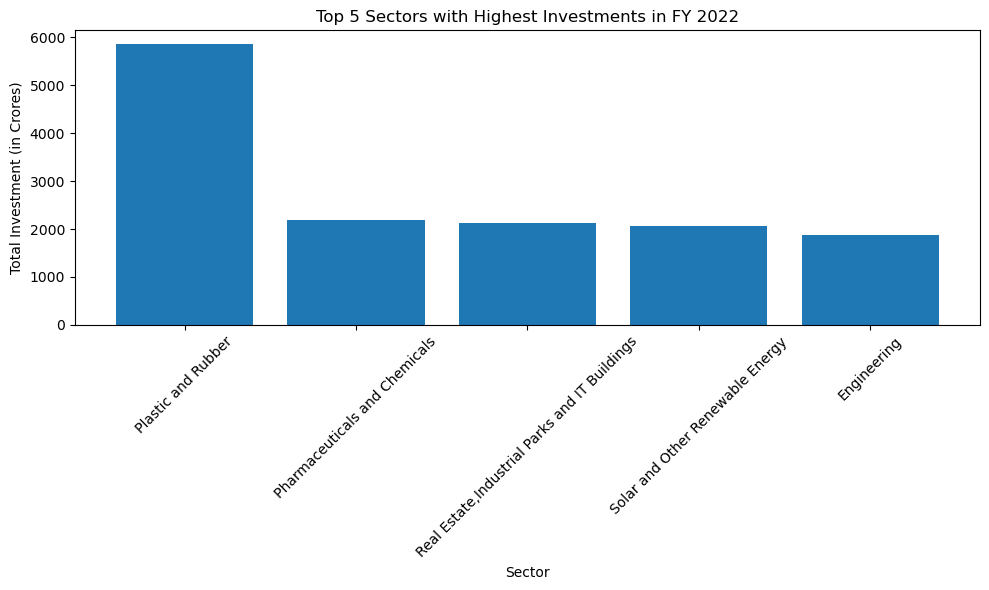

In [105]:
fy_2022_data = tsipass_merged_df[tsipass_merged_df['fiscal_year'] == 2022]

# Group the data by sector and calculate the total investment in each sector
sector_investment = fy_2022_data.groupby('sector')['investment in cr'].sum().reset_index()

# Sort the sectors by total investment in descending order
top_5_sectors = sector_investment.sort_values(by='investment in cr', ascending=False).head(5)

# Print the top 5 sectors
print("Top 5 Sectors with Highest Investments in FY 2022:")
print(top_5_sectors)

# Create a bar chart to visualize the top 5 sectors
plt.figure(figsize=(10, 6))
plt.bar(top_5_sectors['sector'], top_5_sectors['investment in cr'])
plt.xlabel('Sector')
plt.ylabel('Total Investment (in Crores)')
plt.title('Top 5 Sectors with Highest Investments in FY 2022')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [106]:
##List down the top 3 districts that have attracted the most significant 
##sector investments during FY 2019 to 2022? What factors could have 
##led to the substantial investments in these particular districts? 

Top 3 Districts with Highest Sector Investments (FY 2019-2022):
              district  investment in cr
25          Rangareddy        42706.3320
26          Sangareddy        12366.7556
16  Medchal_Malkajgiri        10394.5610


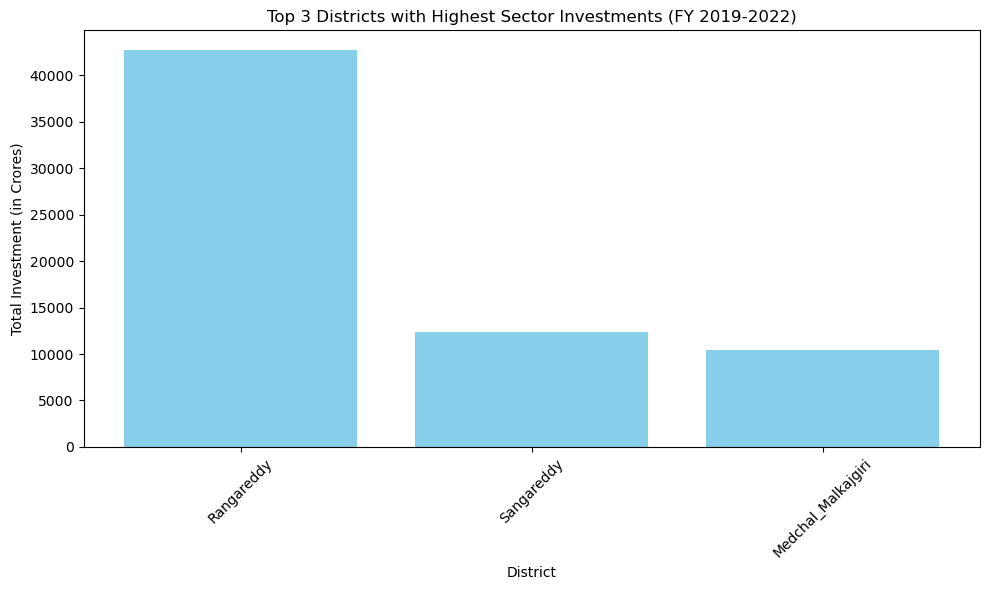

In [107]:
# Filter the data for fiscal years 2019 to 2022
fy_2019_to_2022_data = tsipass_merged_df[(tsipass_merged_df['fiscal_year'] >= 2019) & (tsipass_merged_df['fiscal_year'] <= 2022)]

# Group the data by district and calculate the total investment in each district
district_investment = fy_2019_to_2022_data.groupby('district')['investment in cr'].sum().reset_index()

# Sort the districts by total investment in descending order
top_3_districts = district_investment.sort_values(by='investment in cr', ascending=False).head(3)

# Print the top 3 districts with the highest sector investments
print("Top 3 Districts with Highest Sector Investments (FY 2019-2022):")
print(top_3_districts)

# Visualize the top 3 districts with a bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_3_districts['district'], top_3_districts['investment in cr'], color='skyblue')
plt.title('Top 3 Districts with Highest Sector Investments (FY 2019-2022)')
plt.xlabel('District')
plt.ylabel('Total Investment (in Crores)')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


In [108]:
#Is there any relationship between district investments, vehicles 
#sales and stamps revenue within the same district between FY 2021 and 2022? 

In [112]:
# Filter data for FY 2021 and FY 2022
investment_data_21_22 = tsipass_merged_df[(tsipass_merged_df['fiscal_year'] >= 2021) & (tsipass_merged_df['fiscal_year'] <= 2022)]
vehicle_sales_data_21_22 = transport_merged_df[(transport_merged_df['fiscal_year'] >= 2021) & (transport_merged_df['fiscal_year'] <= 2022)]
stamp_revenue_data_21_22 = merged_df[(merged_df['fiscal_year'] >= 2021) & (merged_df['fiscal_year'] <= 2022)]

# Group data by district and calculate total investments, total vehicle sales, and total stamp revenue
investment_by_district = investment_data_21_22.groupby('district')['investment in cr'].sum().reset_index()
vehicle_sales_by_district = vehicle_sales_data_21_22.groupby('district')['Brand_new_vehicles'].sum().reset_index()
stamp_revenue_by_district = stamp_revenue_data_21_22.groupby('district')['documents_registered_rev'].sum().reset_index()

# Merge the data for all three variables based on the district
new_merged_data = pd.merge(investment_by_district, vehicle_sales_by_district, on='district')
new_merged_data = pd.merge(new_merged_data, stamp_revenue_by_district, on='district')

# Perform correlation analysis
correlation_matrix = new_merged_data.corr()

# Print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)



Correlation Matrix:
                          investment in cr  Brand_new_vehicles  \
investment in cr                  1.000000            0.560139   
Brand_new_vehicles                0.560139            1.000000   
documents_registered_rev          0.827343            0.872953   

                          documents_registered_rev  
investment in cr                          0.827343  
Brand_new_vehicles                        0.872953  
documents_registered_rev                  1.000000  


C:\Users\paulk\AppData\Local\Temp\ipykernel_936\1584491562.py:16: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = new_merged_data.corr()


In [113]:
# Are there any particular sectors that have shown substantial      
#investment in multiple districts between FY 2021 and 2022?

Top 5 Sectors with Substantial Investment in Multiple Districts (FY 2021 and 2022):

sector
Pharmaceuticals and Chemicals                    9042.5663
Plastic and Rubber                               7915.2340
Real Estate,Industrial Parks and IT Buildings    4142.5582
Engineering                                      2844.9705
Food Processing                                  2455.3056
Name: investment in cr, dtype: float64


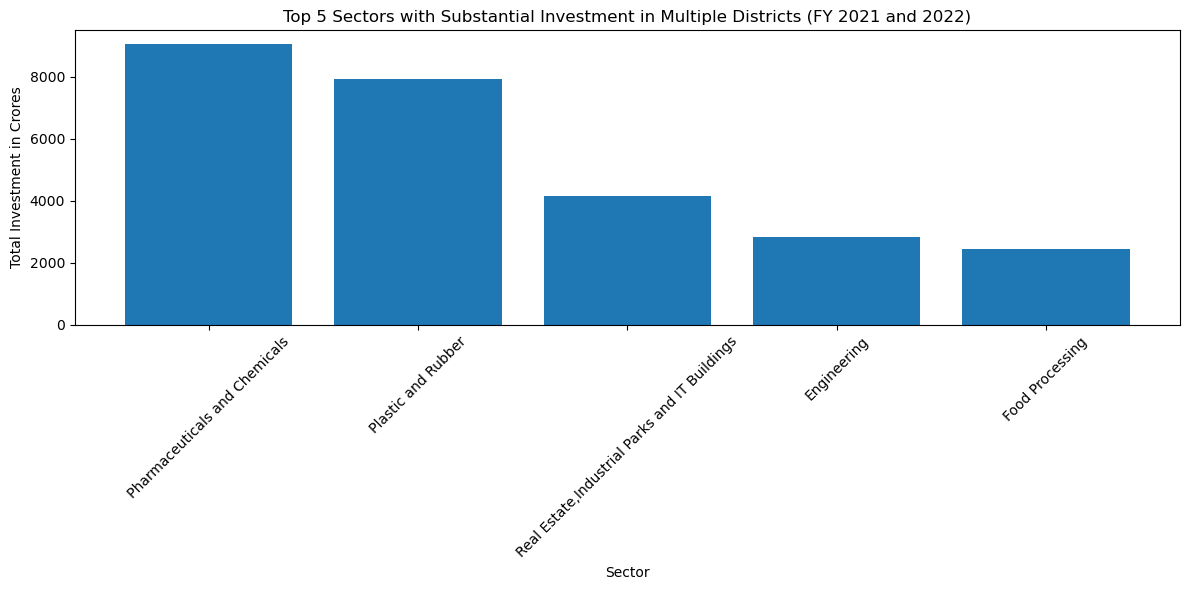

In [114]:
# Filter data for FY 2021 and 2022
filtered_data = tsipass_merged_df[(tsipass_merged_df['fiscal_year'] == 2021) | (tsipass_merged_df['fiscal_year'] == 2022)]

# Aggregate investment by sector and district for both years
investment_by_sector_district = filtered_data.groupby(['sector', 'district'])['investment in cr'].sum().reset_index()

# Identify sectors with substantial investment in multiple districts
substantial_investment_sectors = investment_by_sector_district.groupby('sector')['investment in cr'].sum().sort_values(ascending=False).head(5)

# Print the sectors with substantial investment
print("Top 5 Sectors with Substantial Investment in Multiple Districts (FY 2021 and 2022):\n")
print(substantial_investment_sectors)

# Create a bar chart to visualize the results
plt.figure(figsize=(12, 6))
plt.bar(substantial_investment_sectors.index, substantial_investment_sectors.values)
plt.xlabel('Sector')
plt.ylabel('Total Investment in Crores')
plt.title('Top 5 Sectors with Substantial Investment in Multiple Districts (FY 2021 and 2022)')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the bar chart
plt.show()


In [115]:
#Can we identify any seasonal patterns or cyclicality in the  
#investment trends for specific sectors? Do certain sectors     
#experience higher investments during particular months? 

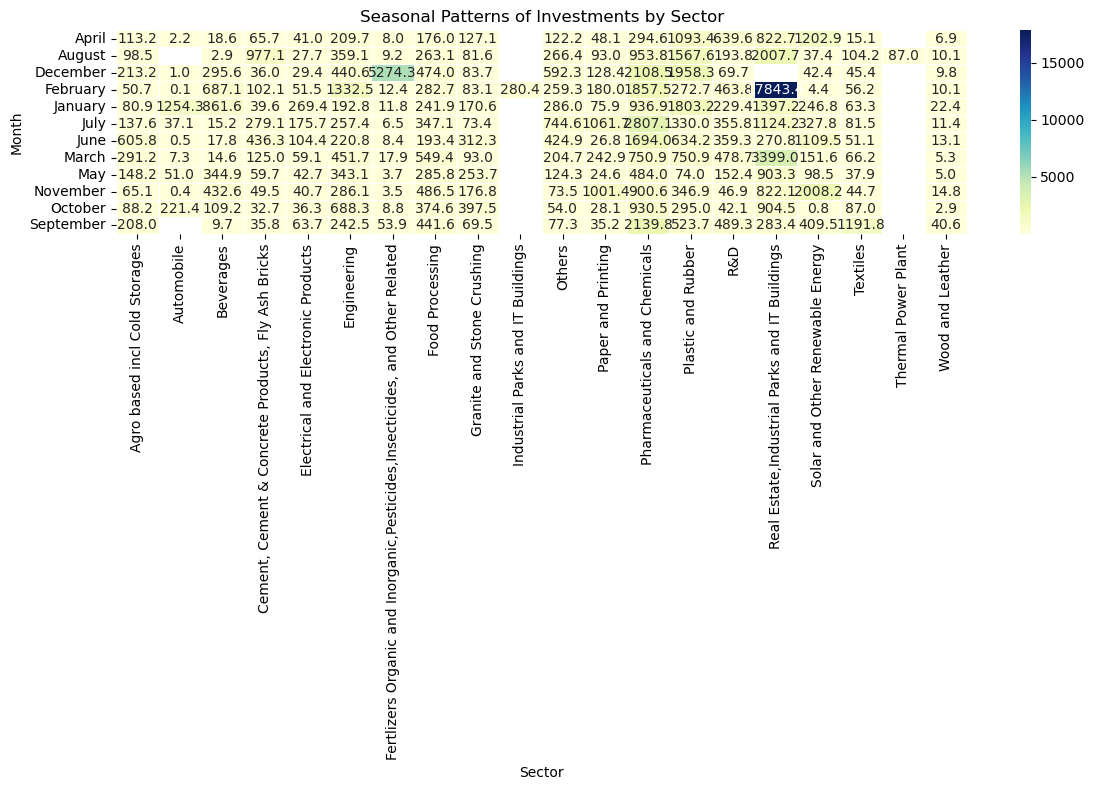

In [117]:
# Convert the 'month' column to datetime format
tsipass_merged_df['month'] = pd.to_datetime(tsipass_merged_df['month'])

# Extract relevant columns
investment_data = tsipass_merged_df[['month', 'sector', 'investment in cr']]

# Group data by sector and month, summing the investments
investment_by_sector_month = investment_data.groupby(['sector', tsipass_merged_df['month'].dt.strftime('%B')])['investment in cr'].sum().reset_index()

# Pivot the data for easier visualization
investment_by_sector_month_pivot = investment_by_sector_month.pivot(index='month', columns='sector', values='investment in cr')

# Create a heatmap to visualize seasonal patterns
plt.figure(figsize=(12, 8))
sns.heatmap(investment_by_sector_month_pivot, cmap='YlGnBu', annot=True, fmt=".1f", linewidths=0.5)
plt.xlabel('Sector')
plt.ylabel('Month')
plt.title('Seasonal Patterns of Investments by Sector')
plt.tight_layout()

# Show the heatmap
plt.show()


In [120]:
# Extra Questiom 1 : How have investments in different sectors evolved over time? 
#Are there sectors that have seen consistent growth, while others have declined? Visualize these trends.

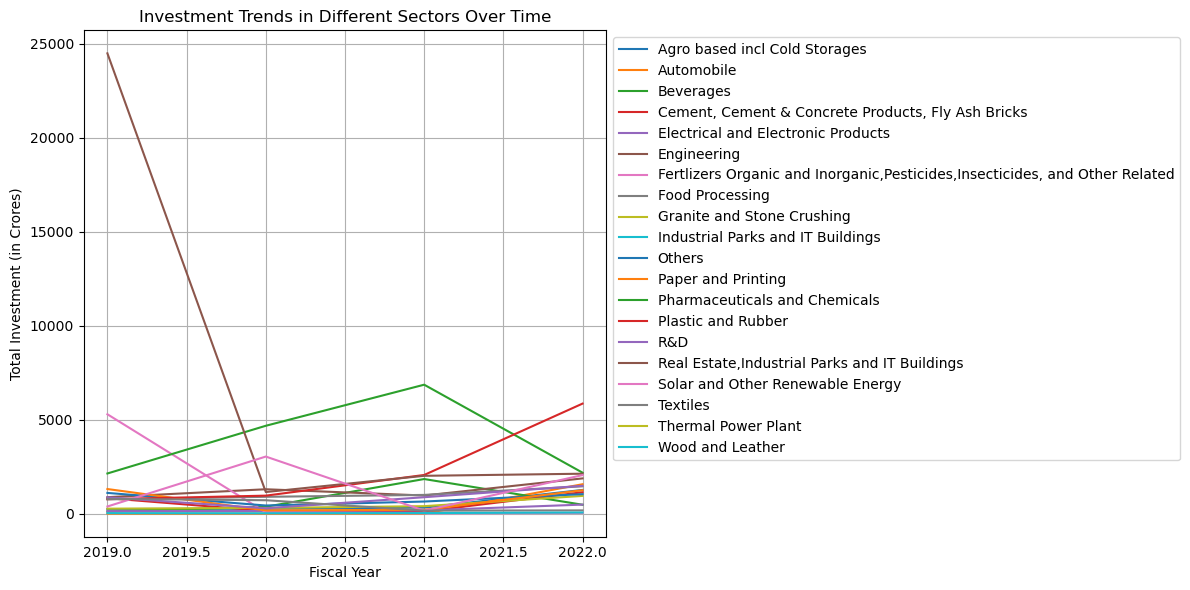

In [119]:
# Convert the 'month' column to a datetime object
tsipass_merged_df['month'] = pd.to_datetime(tsipass_merged_df['month'])

# Group the data by sector and fiscal year, and sum the investments
sector_investments = tsipass_merged_df.groupby(['sector', 'fiscal_year'])['investment in cr'].sum().unstack().T

# Create a line chart for investment trends
plt.figure(figsize=(12, 6))
for sector in sector_investments.columns:
    plt.plot(sector_investments.index, sector_investments[sector], label=sector)

plt.title('Investment Trends in Different Sectors Over Time')
plt.xlabel('Fiscal Year')
plt.ylabel('Total Investment (in Crores)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)

plt.tight_layout()
plt.show()


In [121]:
#Extra question 2 : Which sectors have the highest and lowest average numbers of employees?
#Create a visual representation of this distribution.

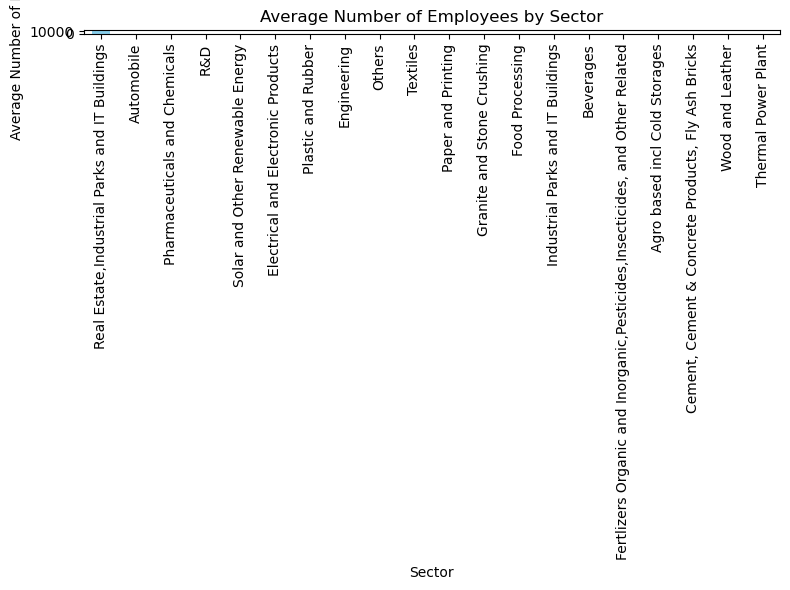

Sector with the highest average employees: Real Estate,Industrial Parks and IT Buildings (12157.17 employees on average)
Sector with the lowest average employees: Thermal Power Plant (9.00 employees on average)


In [129]:
# Group the data by sector and calculate the average number of employees
average_employees_by_sector = tsipass_merged_df.groupby('sector')['number_of_employees'].mean().sort_values(ascending=False)

# Plot the distribution of average employees by sector
plt.figure(figsize=(8, 6))
average_employees_by_sector.plot(kind='bar', color='skyblue')
plt.title('Average Number of Employees by Sector')
plt.xlabel('Sector')
plt.ylabel('Average Number of Employees')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
# Sector with the highest average employees
highest_avg_employees = average_employees_by_sector.idxmax()
highest_avg_value = average_employees_by_sector.max()

# Sector with the lowest average employees
lowest_avg_employees = average_employees_by_sector.idxmin()
lowest_avg_value = average_employees_by_sector.min()

print(f'Sector with the highest average employees: {highest_avg_employees} ({highest_avg_value:.2f} employees on average)')
print(f'Sector with the lowest average employees: {lowest_avg_employees} ({lowest_avg_value:.2f} employees on average)')
